# Old


Per-PS data for GPT 4:
           ReadingEase  GradeLevel  Adherence
PromptSet                                    
PS1             36.975          12      0.645
PS2             20.403          16      0.654
PS3             27.668          14      0.677
PS4             25.569          15      0.651
PS5             29.016          14      0.656 

Correlation between ReadingEase, GradeLevel, Adherence (rows = PS1..PS5):
             ReadingEase  GradeLevel  Adherence
ReadingEase     1.000000   -0.992850  -0.267024
GradeLevel     -0.992850    1.000000   0.172206
Adherence      -0.267024    0.172206   1.000000 



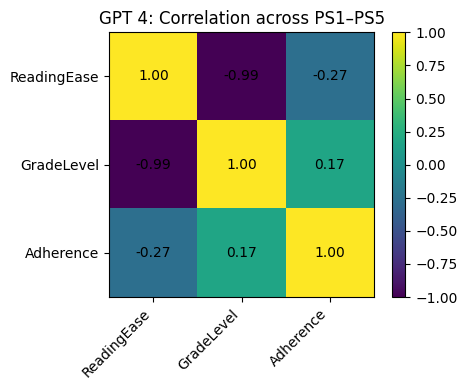


Per-PS data for GPT 3.5:
           ReadingEase  GradeLevel  Adherence
PromptSet                                    
PS1             20.717          15      0.646
PS2             19.720          15      0.659
PS3             19.578          16      0.685
PS4             17.891          16      0.655
PS5             20.451          16      0.652 

Correlation between ReadingEase, GradeLevel, Adherence (rows = PS1..PS5):
             ReadingEase  GradeLevel  Adherence
ReadingEase     1.000000   -0.452073  -0.215492
GradeLevel     -0.452073    1.000000   0.417791
Adherence      -0.215492    0.417791   1.000000 



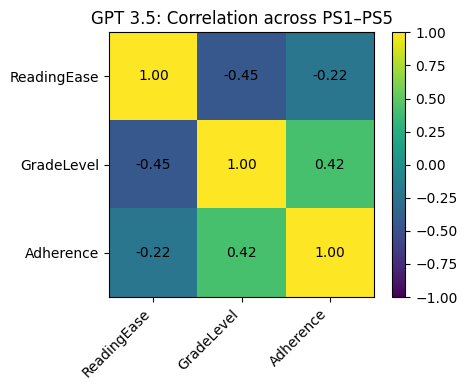


Per-PS data for Palm 2:
           ReadingEase  GradeLevel  Adherence
PromptSet                                    
PS1             41.551          11      0.644
PS2             30.011          13      0.653
PS3             23.168          14      0.669
PS4             27.544          14      0.643
PS5             10.391          17      0.648 

Correlation between ReadingEase, GradeLevel, Adherence (rows = PS1..PS5):
             ReadingEase  GradeLevel  Adherence
ReadingEase     1.000000   -0.989663  -0.247242
GradeLevel     -0.989663    1.000000   0.113171
Adherence      -0.247242    0.113171   1.000000 



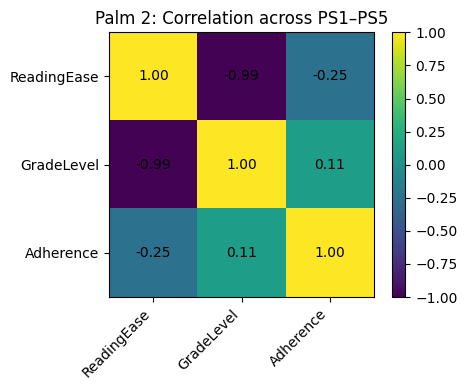


Per-PS data for Llama 2:
           ReadingEase  GradeLevel  Adherence
PromptSet                                    
PS1             36.858          12      0.651
PS2             32.756          13      0.641
PS3             33.698          14      0.674
PS4             30.162          14      0.641
PS5             33.332          14      0.648 

Correlation between ReadingEase, GradeLevel, Adherence (rows = PS1..PS5):
             ReadingEase  GradeLevel  Adherence
ReadingEase     1.000000   -0.745575   0.352574
GradeLevel     -0.745575    1.000000   0.205777
Adherence       0.352574    0.205777   1.000000 



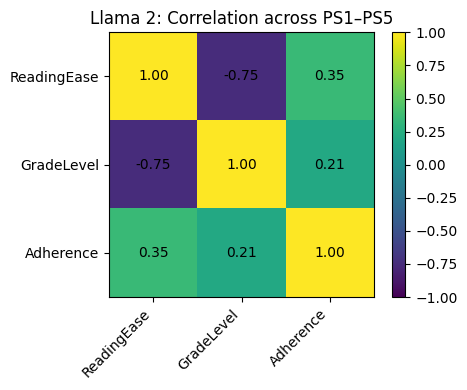


Per-PS data for Mistral:
           ReadingEase  GradeLevel  Adherence
PromptSet                                    
PS1             29.391          13      0.648
PS2             27.799          14      0.650
PS3             22.145          15      0.686
PS4             24.525          16      0.651
PS5             26.467          15      0.654 

Correlation between ReadingEase, GradeLevel, Adherence (rows = PS1..PS5):
             ReadingEase  GradeLevel  Adherence
ReadingEase     1.000000   -0.769796  -0.820945
GradeLevel     -0.769796    1.000000   0.283860
Adherence      -0.820945    0.283860   1.000000 



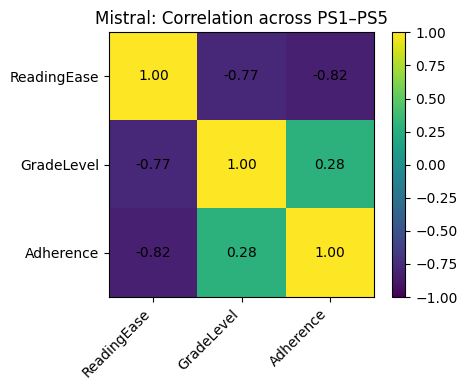

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ===== 1) Data setup =====
reading_ease = pd.DataFrame({
    "Models": ["GPT 4", "GPT 3.5", "Palm 2", "Llama 2", "Mistral"],
    "PS1": [36.975, 20.717, 41.551, 36.858, 29.391],
    "PS2": [20.403, 19.72, 30.011, 32.756, 27.799],
    "PS3": [27.668, 19.578, 23.168, 33.698, 22.145],
    "PS4": [25.569, 17.891, 27.544, 30.162, 24.525],
    "PS5": [29.016, 20.451, 10.391, 33.332, 26.467],
    "ALL": [27.926, 19.671, 26.533, 33.361, 26.065]
}).set_index("Models")

grade_level = pd.DataFrame({
    "Models": ["GPT 4", "GPT 3.5", "Palm 2", "Llama 2", "Mistral"],
    "PS1": [12, 15, 11, 12, 13],
    "PS2": [16, 15, 13, 13, 14],
    "PS3": [14, 16, 14, 14, 15],
    "PS4": [15, 16, 14, 14, 16],
    "PS5": [14, 16, 17, 14, 15],
    "ALL": [14, 16, 14, 13, 14]
}).set_index("Models")

adherence = pd.DataFrame({
    "Models": ["GPT 4", "GPT 3.5", "Palm 2", "Llama 2", "Mistral"],
    "PS1": [0.645, 0.646, 0.644, 0.651, 0.648],
    "PS2": [0.654, 0.659, 0.653, 0.641, 0.65],
    "PS3": [0.677, 0.685, 0.669, 0.674, 0.686],
    "PS4": [0.651, 0.655, 0.643, 0.641, 0.651],
    "PS5": [0.656, 0.652, 0.648, 0.648, 0.654],
    "ALL": [0.657, 0.66, 0.651, 0.651, 0.658]
}).set_index("Models")

# ===== 2) Helper to build PS1..PS5 rows for a chosen model =====
def build_ps_dataframe(model_name: str) -> pd.DataFrame:
    ps_cols = ["PS1", "PS2", "PS3", "PS4", "PS5"]  # exclude ALL
    df = pd.DataFrame({
        "ReadingEase": reading_ease.loc[model_name, ps_cols].values,
        "GradeLevel":  grade_level.loc[model_name, ps_cols].values,
        "Adherence":   adherence.loc[model_name, ps_cols].values,
    }, index=ps_cols)
    df.index.name = "PromptSet"
    return df

# ===== 3) Choose model and compute correlations =====
for model in reading_ease.index.values:
    df_model_ps = build_ps_dataframe(model)

    print(f"\nPer-PS data for {model}:")
    print(df_model_ps, "\n")

    corr = df_model_ps.corr(method="pearson")
    print("Correlation between ReadingEase, GradeLevel, Adherence (rows = PS1..PS5):")
    print(corr, "\n")

    # ===== 4) Heatmap with Matplotlib (no seaborn) =====
    fig, ax = plt.subplots(figsize=(5, 4))
    im = ax.imshow(corr.values, vmin=-1, vmax=1)

    ax.set_xticks(np.arange(corr.shape[1]))
    ax.set_yticks(np.arange(corr.shape[0]))
    ax.set_xticklabels(corr.columns, rotation=45, ha="right")
    ax.set_yticklabels(corr.index)

    # annotate cells
    for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            ax.text(j, i, f"{corr.values[i, j]:.2f}", ha="center", va="center")

    ax.set_title(f"{model}: Correlation across PS1–PS5")
    fig.colorbar(im, ax=ax)
    plt.tight_layout()
    plt.show()

    # ===== 5) (Optional) quick scatterplots with labels for the 5 PS points =====
    def scatter_pair(xcol, ycol):
        plt.figure(figsize=(5, 4))
        x, y = df_model_ps[xcol].values, df_model_ps[ycol].values
        plt.scatter(x, y)
        for ps, xv, yv in zip(df_model_ps.index, x, y):
            plt.text(xv, yv, ps, fontsize=9, ha="left", va="bottom")
        r = np.corrcoef(x, y)[0, 1]
        plt.xlabel(xcol)
        plt.ylabel(ycol)
        plt.title(f"{model} — {ycol} vs {xcol} (r={r:.2f})")
        plt.tight_layout()
        plt.show()


# New

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

In [ ]:
def analysis(adherence, grade_level, grade_level_alignment, reading_ease, bert_alignment, bloom_verb_alignment, llm_count=None, ncols=3):

    # --- Make tidy ---
    def make_tidy(adher, grade, gla, reading, bert, bva):
        a = adher.reset_index().melt(id_vars="Models", var_name="PS", value_name="A")
        g = grade.reset_index().melt(id_vars="Models", var_name="PS", value_name="GL")
        ga = gla.reset_index().melt(id_vars="Models", var_name="PS", value_name="GA")
        r = reading.reset_index().melt(id_vars="Models", var_name="PS", value_name="RE")
        ba = bert.reset_index().melt(id_vars="Models", var_name="PS", value_name="BA")
        bv = bva.reset_index().melt(id_vars="Models", var_name="PS", value_name="VA")

        ga["GA"] = pd.to_numeric(ga["GA"], errors="coerce")

        df = (
            a.merge(g, on=["Models", "PS"])
             .merge(ga, on=["Models", "PS"])
             .merge(r, on=["Models", "PS"])
             .merge(ba, on=["Models", "PS"])
             .merge(bv, on=["Models", "PS"])
        )

        df = df[df["PS"].isin([f"PS{i}" for i in range(1, 6)])].reset_index(drop=True)
        return df

    df = make_tidy(adherence, grade_level, grade_level_alignment, reading_ease, bert_alignment, bloom_verb_alignment)

    # --- Correlations ---
    def correlations_by_model(df, method="pearson"):
        corr_mats = {}
        pair_rows = []
        cols = [c for c in df.columns if c not in ["Models", "PS"]]
        model_order = df["Models"].unique()

        for model in model_order:
            sub = df[df["Models"] == model]
            C = sub[cols].corr(method=method)
            corr_mats[model] = C
            for x, y in combinations(cols, 2):
                pair_rows.append({"Model": model, "Pair": f"{x} ~ {y}", "r": C.loc[x, y]})

        pair_table = (
            pd.DataFrame(pair_rows)
              .pivot(index="Model", columns="Pair", values="r")
              .reindex(model_order)
        )
        return corr_mats, pair_table, model_order

    corr_dict, pair_table, model_order = correlations_by_model(df, method="pearson")
    print("\nCorrelation summary per model (Pearson, PS1–PS5):")
    print(pair_table.round(3))

    # --- Plot correlation grid ---
    def plot_corr_grid(corr_dict, model_order, llm_count=None, ncols=3):
        if llm_count is None or llm_count >= len(model_order):
            llm_models = list(model_order)
            slm_models = []
        else:
            llm_models = list(model_order[:llm_count])
            slm_models = list(model_order[llm_count:])

        remainder = len(llm_models) % ncols
        if remainder > 0:
            llm_models += [None] * (ncols - remainder)

        all_models = llm_models + slm_models
        total_rows = int(np.ceil(len(all_models) / ncols))

        fig, axes = plt.subplots(
            nrows=total_rows, ncols=ncols, figsize=(4.6*ncols, 4.2*total_rows)
        )
        axes = np.atleast_2d(axes).flatten()
        last_im = None

        for ax, model in zip(axes, all_models):
            if model is None:
                fig.delaxes(ax)
                continue
            C = corr_dict[model]
            last_im = ax.imshow(C.values, vmin=-1, vmax=1, cmap="coolwarm")
            ax.set_title(model)
            ax.set_xticks(range(C.shape[1])); ax.set_yticks(range(C.shape[0]))
            ax.set_xticklabels(C.columns, rotation=45, ha="right")
            ax.set_yticklabels(C.index)
            for i in range(C.shape[0]):
                for j in range(C.shape[1]):
                    ax.text(j, i, f"{C.values[i,j]:.2f}", ha="center", va="center")

        for ax in axes[len(all_models):]:
            fig.delaxes(ax)

        # --- Separator below last true LLM row ---
        if len(slm_models) > 0 and llm_count is not None and llm_count > 0:
            real_llm_rows = int(np.ceil(llm_count / ncols))
            last_llm_ax = axes[(real_llm_rows - 1) * ncols]
            # get bottom of that row in figure coordinates
            bbox = last_llm_ax.get_position()
            y = bbox.y0 - 0.018
            fig.lines.append(
                plt.Line2D([0, 0.88], [y, y], color="black", linewidth=2, transform=fig.transFigure)
            )

        if last_im is not None:
            cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
            fig.colorbar(last_im, cax=cbar_ax)

        plt.tight_layout(rect=[0, 0, 0.9, 0.95])
        plt.show()

    plot_corr_grid(corr_dict, model_order, llm_count=llm_count, ncols=ncols)

    # --- Scatter triangle ---
    def scatter_triangle(df, model):
        sub = df[df["Models"] == model]
        cols = [c for c in df.columns if c not in ["Models", "PS"]]
        pairs = list(combinations(cols, 2))

        fig, axes = plt.subplots(1, len(pairs), figsize=(4.2*len(pairs), 3.6))
        if len(pairs) == 1:
            axes = [axes]

        for ax, (x, y) in zip(axes, pairs):
            ax.scatter(sub[x], sub[y])
            for _, row in sub.iterrows():
                ax.text(row[x], row[y], row["PS"], fontsize=9, ha="left", va="bottom")
            r = np.corrcoef(sub[x], sub[y])[0,1]
            ax.set_xlabel(x); ax.set_ylabel(y)
            ax.set_title(f"{model}: {y} vs {x} (r={r:.2f})")

        plt.tight_layout()
        plt.show()

    return df, corr_dict, pair_table, model_order

In [12]:
# LLMs
reading_ease_llm = pd.DataFrame({
    "Models": ["GPT 4", "GPT 3.5", "Palm 2", "Llama 2", "Mistral"],
    "PS1": [36.95, 20.73, 41.51, 36.88, 29.36],
    "PS2": [20.38, 19.7, 30.01, 32.71, 27.75],
    "PS3": [27.71, 19.57, 23.12, 33.69, 22.11],
    "PS4": [25.62, 17.81, 27.52, 30.11, 24.55],
    "PS5": [29.01, 20.45, 10.33, 33.33, 26.45]
    # "ALL": [27.926, 19.671, 26.533, 33.361, 26.065]
}).set_index("Models")

grade_level_llm = pd.DataFrame({
    "Models": ["GPT 4", "GPT 3.5", "Palm 2", "Llama 2", "Mistral"],
    "PS1": [12, 15, 11, 12, 13],
    "PS2": [16, 15, 13, 13, 14],
    "PS3": [14, 16, 14, 14, 15],
    "PS4": [15, 16, 14, 14, 16],
    "PS5": [14, 16, 17, 14, 15]
    # "ALL": [14, 16, 14, 13, 14]
}).set_index("Models")

adherence_llm = pd.DataFrame({
    "Models": ["GPT 4", "GPT 3.5", "Palm 2", "Llama 2", "Mistral"],
    "PS1": [0.65, 0.65, 0.64, 0.65, 0.65],
    "PS2": [0.65, 0.66, 0.65, 0.64, 0.65],
    "PS3": [0.68, 0.68, 0.67, 0.67, 0.69],
    "PS4": [0.65, 0.66, 0.64, 0.64, 0.65],
    "PS5": [0.66, 0.65, 0.65, 0.65, 0.65]
    # "ALL": [0.657, 0.660, 0.651, 0.651, 0.658]
}).set_index("Models")

grade_level_alignment_llm = pd.DataFrame({
    "Models": ["GPT 4", "GPT 3.5", "Palm 2", "Llama 2", "Mistral"],
    "PS1": ["NA", "NA", "NA", "NA", "NA"],
    # "PS1": [72, 39, 17, 83, 54], # fake data
    "PS2": [68, 63, 34, 31, 45],
    "PS3": [36, 65, 49, 41, 55],
    "PS4": [50, 65, 45, 33, 60],
    "PS5": [37, 63, 73, 42, 54]
    # "ALL": [40, 57, 46, 33, 50]
}).set_index("Models")

bert_alignment_llm = pd.DataFrame({
    "Models": ["GPT 4", "GPT 3.5", "Palm 2", "Llama 2", "Mistral"],
    "PS1": [82, 59, 71, 41, 71],
    "PS2": [88, 76, 53, 41, 59],
    "PS3": [82, 88, 65, 47, 53],
    "PS4": [82, 88, 59, 53, 82],
    "PS5": [94, 76, 59, 41, 76]
}).set_index("Models")

bloom_verb_alignment_llm = pd.DataFrame({
    "Models": ["GPT 4", "GPT 3.5", "Palm 2", "Llama 2", "Mistral"],
    "PS1": [76, 79, 62, 62, 54],
    "PS2": [98, 93, 71, 91, 75],
    "PS3": [100, 91, 75, 82, 73],
    "PS4": [100, 100, 80, 96, 94],
    "PS5": [100, 100, 91, 97, 92]
    # "ALL": [0.657, 0.660, 0.651, 0.651, 0.658]
}).set_index("Models")

In [13]:
# SLMs
reading_ease_slm = pd.DataFrame({
    "Models": ["Granite 4", "Phi 4 mini", "Llama 3.2", "Mistral Small", "GPT-OSS", "Phi 4", "Deepseek R1", "Gemma 3"],
    "PS1": [26.99, 21.02, 37.24, 41.05, 36.56, 24.42, 30.92, 36.68],
    "PS2": [30.46, 20.18, 27.75, 31.56, 32.07, 16.82, 27.01, 28.37],
    "PS3": [26.22, 12.38, 18.85, 25.58, 27.02, 16.74, 25.07, 28.78],
    "PS4": [21.94, 19.17, 18.62, 29.54, 23.02, 17.69, 24.65, 24.9],
    "PS5": [28, 21.85, 23.82, 28.34, 22.92, 17.25, 27.52, 24.11]
}).set_index("Models")

grade_level_slm = pd.DataFrame({
    "Models": ["Granite 4", "Phi 4 mini", "Llama 3.2", "Mistral Small", "GPT-OSS", "Phi 4", "Deepseek R1", "Gemma 3"],
    "PS1": [15, 16, 12, 12, 13, 14, 13, 13],
    "PS2": [14, 16, 14, 13, 13, 16, 13, 14],
    "PS3": [14, 18, 16, 15, 14, 16, 14, 13],
    "PS4": [15, 16, 15, 14, 15, 16, 14, 14],
    "PS5": [14, 16, 14, 14, 14, 16, 14, 14]
}).set_index("Models")

adherence_slm = pd.DataFrame({
    "Models": ["Granite 4", "Phi 4 mini", "Llama 3.2", "Mistral Small", "GPT-OSS", "Phi 4", "Deepseek R1", "Gemma 3"],
    "PS1": [0.69, 0.68, 0.69, 0.68, 0.66, 0.69, 0.67, 0.69],
    "PS2": [0.65, 0.65, 0.67, 0.66, 0.65, 0.67, 0.66, 0.68],
    "PS3": [0.76, 0.74, 0.76, 0.77, 0.72, 0.77, 0.75, 0.74],
    "PS4": [0.79, 0.77, 0.78, 0.76, 0.72, 0.76, 0.76, 0.75],
    "PS5": [0.77, 0.76, 0.77, 0.77, 0.73, 0.77, 0.76, 0.78]
}).set_index("Models")

grade_level_alignment_slm = pd.DataFrame({
    "Models": ["Granite 4", "Phi 4 mini", "Llama 3.2", "Mistral Small", "GPT-OSS", "Phi 4", "Deepseek R1", "Gemma 3"],
    "PS1": ["NA", "NA", "NA", "NA", "NA", "NA", "NA", "NA"],
    # "PS1": [44, 52, 11, 84, 76, 33, 68], # fake data
    "PS2": [48, 62, 36, 32, 35, 69, 33, 29],
    "PS3": [49, 66, 64, 55, 43, 70, 42, 30],
    "PS4": [51, 56, 60, 38, 49, 67, 44, 41],
    "PS5": [41, 57, 44, 38, 46, 71, 41, 50]
}).set_index("Models")

bert_alignment_slm = pd.DataFrame({
    "Models": ["Granite 4", "Phi 4 mini", "Llama 3.2", "Mistral Small", "GPT-OSS", "Phi 4", "Deepseek R1", "Gemma 3"],
    "PS1": [76, 100, 71, 82, 71, 88, 71, 100],
    "PS2": [88, 82, 76, 71, 76, 100, 76, 100],
    "PS3": [65, 88, 94, 82, 88, 88, 53, 88],
    "PS4": [47, 80, 88, 76, 94, 82, 76, 100],
    "PS5": [65, 76, 94, 94, 94, 94, 71, 88]
}).set_index("Models")

bloom_verb_alignment_slm = pd.DataFrame({
    "Models": ["Granite 4", "Phi 4 mini", "Llama 3.2", "Mistral Small", "GPT-OSS", "Phi 4", "Deepseek R1", "Gemma 3"],
    "PS1": [76, 82, 83, 80, 86, 87, 72, 97],
    "PS2": [85, 88, 86, 82, 88, 89, 89, 96],
    "PS3": [75, 81, 89, 84, 93, 92, 85, 95],
    "PS4": [88, 78, 92, 91, 94, 86, 82, 96],
    "PS5": [84, 80, 93, 90, 94, 89, 85, 98]
}).set_index("Models")


Correlation summary per model (Pearson, PS1–PS5):
Pair           A ~ BA  A ~ GA  A ~ GL  A ~ RE  A ~ VA  BA ~ VA  GA ~ BA  \
Model                                                                     
GPT 4          -0.086  -0.726  -0.103   0.013   0.378    0.360   -0.029   
GPT 3.5         0.703   0.688   0.373  -0.365   0.071    0.733    1.000   
Palm 2         -0.000   0.044   0.282  -0.411   0.152   -0.481    0.373   
Llama 2         0.000   0.763   0.228   0.384  -0.325    0.332   -0.203   
Mistral        -0.709   0.160   0.196  -0.780  -0.158    0.469    0.580   
Granite 4      -0.941  -0.040   0.123  -0.759   0.171   -0.281   -0.229   
Phi 4 mini     -0.480  -0.458   0.213  -0.218  -0.911    0.122    0.897   
Llama 3.2       0.887   0.727   0.623  -0.782   0.882    0.882    0.642   
Mistral Small   0.575   0.622   0.843  -0.716   0.769    0.351    0.271   
GPT-OSS         0.945   0.906   0.838  -0.904   0.954    0.992    0.979   
Phi 4          -0.519   0.191   0.487  -0.445   0

/tmp/ipython-input-1616549712.py:385: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


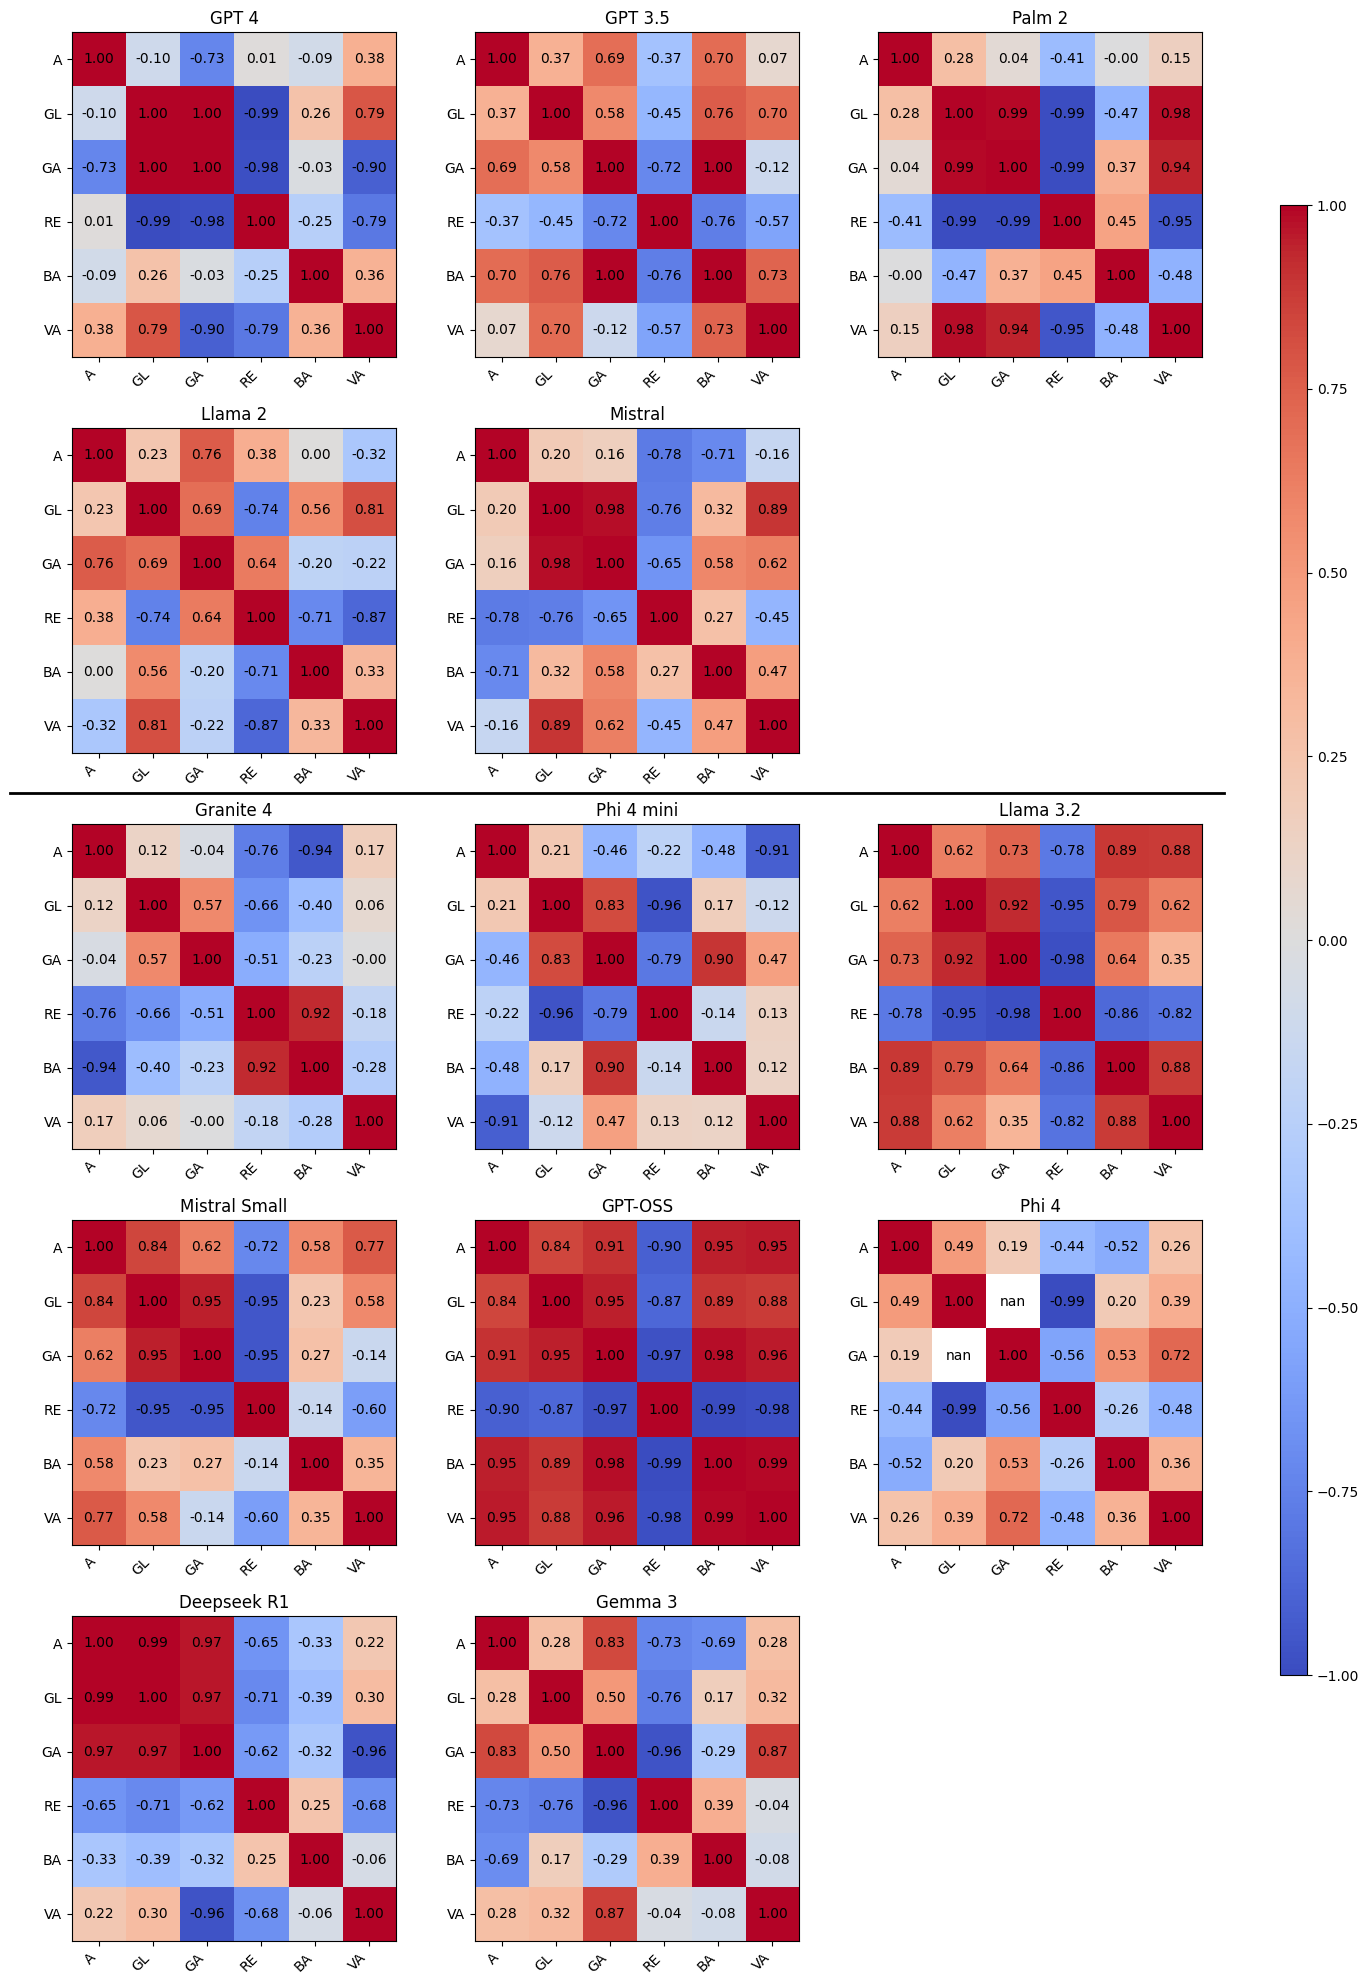

In [14]:
# Combine your data first (LLMs + SLMs)
adherence_all = pd.concat([adherence_llm, adherence_slm])
grade_level_all = pd.concat([grade_level_llm, grade_level_slm])
grade_level_alignment_all = pd.concat([grade_level_alignment_llm, grade_level_alignment_slm])
reading_ease_all = pd.concat([reading_ease_llm, reading_ease_slm])
bert_alignment_all = pd.concat([bert_alignment_llm, bert_alignment_slm])
bloom_verb_alignment_all = pd.concat([bloom_verb_alignment_llm, bloom_verb_alignment_slm])

# Run analysis with boundary after 5 LLMs
# analysis(adherence_all, grade_level_all, grade_level_alignment_all,
#          reading_ease_all, bloom_verb_alignment_all, llm_count=5)

df_all, corr_dict, pair_table, model_order = analysis(
    adherence_all,
    grade_level_all,
    grade_level_alignment_all,
    reading_ease_all,
    bert_alignment_all,
    bloom_verb_alignment_all,
    llm_count=5,  # Number of LLMs at the top
    ncols=3
)